In [ ]:
from keras.applications import VGG19
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,UpSampling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg19 import preprocess_input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train_final = preprocess_input(x_train)
x_test_final = preprocess_input(x_test)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 20292170 (77.41 MB)
Trainable params: 20292170 (77.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
x_val_final = preprocess_input(x_val)
y_val = to_categorical(y_val)

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=20, height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True)
train_datagen.fit(x_train_final)
val_datagen = ImageDataGenerator(rotation_range=20, height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True)
val_datagen.fit(x_val_final)

In [ ]:
history = model.fit(train_datagen.flow(x_train_final, y_train), epochs=15, validation_data=val_datagen.flow(x_val_final, y_val), callbacks=[early_stopping])

Epoch 1/15
1250/1250 [==============================] - 56s 43ms/step - loss: 1.4497 - accuracy: 0.4935 - val_loss: 1.0190 - val_accuracy: 0.6539
Epoch 2/15
1250/1250 [==============================] - 53s 42ms/step - loss: 0.9576 - accuracy: 0.6733 - val_loss: 0.8563 - val_accuracy: 0.7029
Epoch 3/15
1250/1250 [==============================] - 52s 41ms/step - loss: 0.8474 - accuracy: 0.7106 - val_loss: 0.8030 - val_accuracy: 0.7249
Epoch 4/15
1250/1250 [==============================] - 52s 41ms/step - loss: 0.7752 - accuracy: 0.7325 - val_loss: 0.7253 - val_accuracy: 0.7530
Epoch 5/15
1250/1250 [==============================] - 52s 41ms/step - loss: 0.7167 - accuracy: 0.7534 - val_loss: 0.7078 - val_accuracy: 0.7617
Epoch 6/15
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6814 - accuracy: 0.7681 - val_loss: 0.6776 - val_accuracy: 0.7697
Epoch 7/15
1250/1250 [==============================] - 52s 42ms/step - loss: 0.6498 - accuracy: 0.7756 - val_loss: 0.6441 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test_final, y_test)
test_acc = test_acc * 100
print(f'Accuracy on test data: {round(test_acc,2)}')
print(f'Loss on test data: {test_loss}')

313/313 [==============================] - 3s 10ms/step - loss: 0.5252 - accuracy: 0.8281
Accuracy on test data: 82.81
Loss on test data: 0.525232195854187


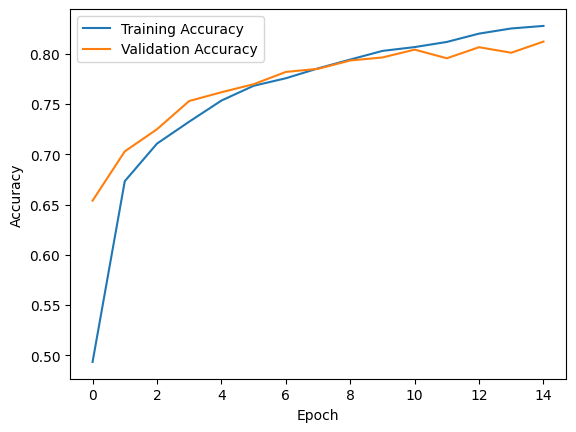

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

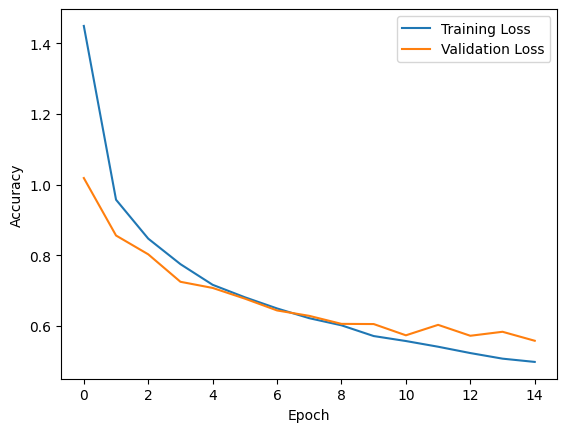

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
y_pred = model.predict(x_test_final)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 9ms/step


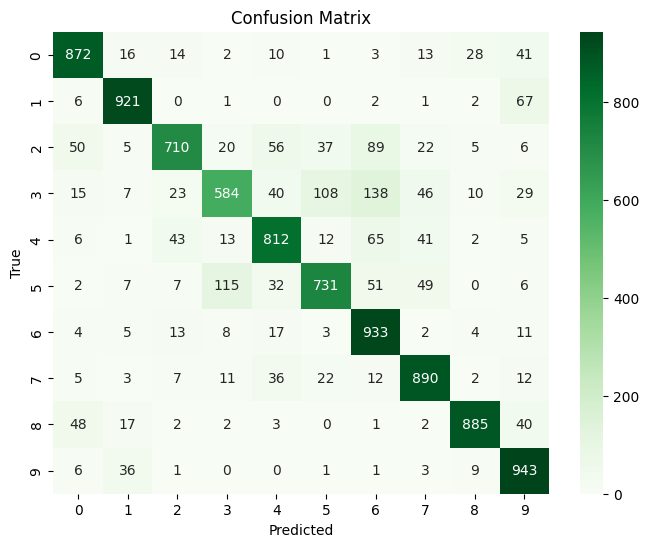

In [ ]:
cm = confusion_matrix(true_labels, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()